In [59]:
#importing mysql connector to make connection to mysql
import mysql.connector
from mysql.connector import Error

In [60]:
#making connection with mysql
try:
    connection = mysql.connector.connect(host='localhost',
                                         database='techblog',
                                         user='root',
                                         password='****')
except:
    print("Error while connecting to MySQL", e)

In [61]:
#fetching data using mysql query
try:
    if connection.is_connected():
        cursor = connection.cursor()
        #fetching article body
        cursor.execute("select body from articles where status = 1 and language = 'English';")
        article_body_rows = cursor.fetchall()
except Error as e:
    print("Error while connecting to MySQL", e)

In [62]:
#importing required libraries
from bs4 import BeautifulSoup
from IPython.display import HTML
import nltk
#download punkt for tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#download wordnet for lemmatization
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankurrastogi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ankurrastogi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
def extract_content_from_html(html_body):
    #converting html string to lxml format
    html_content = BeautifulSoup(html_body, 'lxml')
    return html_content.get_text()

In [64]:
#tokenizing words
unprocessed_word_list = []

for article_body in article_body_rows:
    text = extract_content_from_html(article_body[0])
    word_tk = word_tokenize(text) 
    unprocessed_word_list.extend(word_tk)
    
print(len(unprocessed_word_list))

1666433


In [82]:
#import english stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#add words that aren't in the NLTK stopwords list
new_stopwords = ['and','i','a','so','the','it','u','if','also','you','we','in','in','he','so','let']
new_stopwords_list = stop_words.union(new_stopwords)

#importing for stemming
from nltk.stem import PorterStemmer 
port_stem = PorterStemmer()

#importing for lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

#creating a function to convert the words in lowercase
def isCharacter(word):
    first_character_in_lower_case = word[0].lower()
    ascii_code = ord(first_character_in_lower_case)
    if(ascii_code >= 97 and ascii_code <= 122):
        return True
    return False

processed_word_list = []
for word in unprocessed_word_list: 
    #filtering the words list by removing the stopwords
    if word not in new_stopwords_list and isCharacter(word):
        #converting words to their stem words
        stemmed_word = port_stem.stem(word) 
        #converting words to their lemmatized form
        lemmatized_word = lem.lemmatize(stemmed_word)
        #taking only those lemmatized words which are not in stopwords list 
        if lemmatized_word.lower() not in new_stopwords_list:  
            processed_word_list.append(lemmatized_word.lower())
        
print(len(processed_word_list))

746537


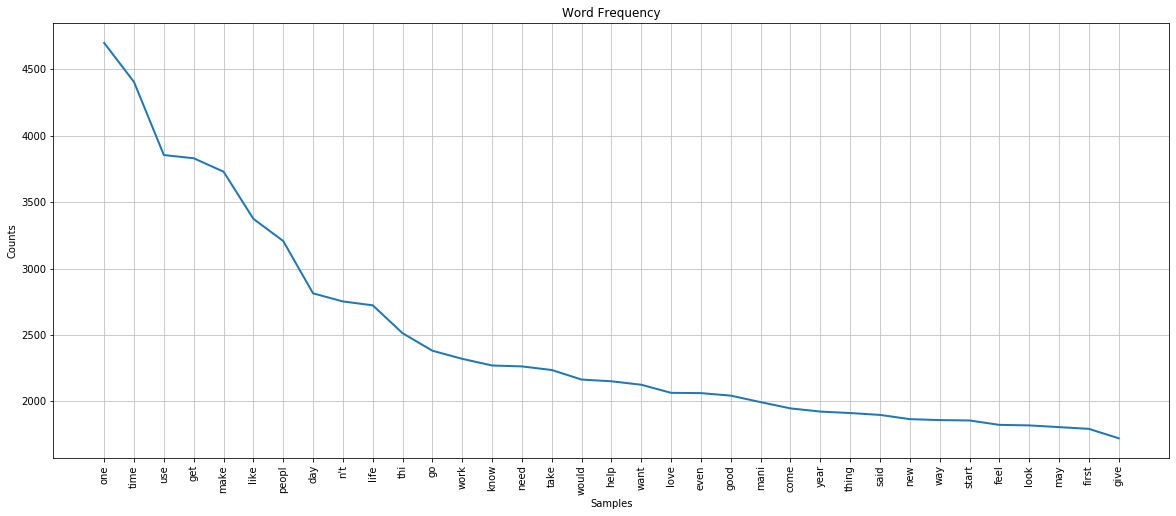

In [90]:
#importing the libraries
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

#finding the frequency distribution of the words and plotting a graph
fig = plt.figure(figsize = (20,8))
fdist = FreqDist(double_processed_word_list)
fdist.plot(35, cumulative = False, title = 'Word Frequency')
plt.show()
fig.savefig('freqDist_Oyewiki.png', bbox_inches = "tight")

The frequency distribution graph has top 35 popular words in Oyewiki articles. It can be observed from the frequency distribution graph that "one" has the maximum number of occurences in Oyewiki articles. It has almost occured 4750 times. The second most popular word is "time" with number of occurences close to 4400. 